# Dataset 1: Mobile Price Dataset
In this data set we will run forward feature selection, PCA, data transformation.

In [ ]:
#indtaling needed library for reading data from kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamidrezafirooze","key":"41885072a44c13f97976c4e4e26ef886"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 23.9MB/s]


In [ ]:
! ls

kaggle.json  mobile-price-classification.zip  sample_data


In [ ]:
#Reading data
import zipfile
zip_ref = zipfile.ZipFile("mobile-price-classification.zip", "r")
zip_ref.extractall("files")
zip_ref.close()
import pandas as pd
test=pd.read_csv("/content/files/test.csv")
train=pd.read_csv("/content/files/train.csv")

In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Task1

In [ ]:
#Defining new column with two classes for mobile with low and high price
train["price_class"]=(train["price_range"]/2).astype(int)
train.drop("price_range", axis=1, inplace=True)

In [ ]:
#Importing needed library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

In [ ]:
#Defining function for logistic regression model
def log_reg(X, y):
  '''
  In this function we get X datframe as feature and y dataframe as classes.
  This gunction returns the AUC score
  '''
  
  clf=LogisticRegression(random_state=0, max_iter=400).fit(X, y)
  y_pred=clf.predict(X)
  AUC_score=roc_auc_score(y, y_pred)
  return AUC_score

In [ ]:
#Defining a function for forward selection
def forward_selection(current_featurs_data_set, new_featres_list,score):
  '''
  
  '''
  best_ft=""
  for new_ft in new_featres_list:
    X=current_featurs_data_set
    X[new_ft]=train[new_ft]
    new_ft_score=log_reg(X, y)
    if new_ft_score>score:
      best_ft=new_ft
      score=new_ft_score
    X.drop(new_ft, axis=1, inplace=True)
  print(best_ft, new_ft_score)
  return best_ft, score

In [ ]:
y=train["price_class"]
score=0
current_features_data_set=pd.DataFrame()
new_features_list=list(train.drop("price_class", axis=1))
stoppoing_rule=False
while stoppoing_rule==False:
  new_best_ft,  score=forward_selection(current_features_data_set, new_features_list,score)
  if new_best_ft!="":
    current_features_data_set[new_best_ft]=train[new_best_ft]
    new_features_list.remove(new_best_ft)
    print(len(current_features_data_set.dtypes))
  else:
    stoppoing_rule=True

ram 0.507
1
battery_power 0.912
2
px_height 0.9355
3
px_width 0.9674999999999999
4
mobile_wt 0.988
5
four_g 0.992
6
talk_time 0.9930000000000001
7
 0.9935


## Task2

In [ ]:
#Reporting score for current selected features
clf=LogisticRegression(random_state=0, max_iter=400)
clf.fit(current_features_data_set, y)
y_preds=clf.predict(current_features_data_set)
print(f"f1_score = {f1_score(y, y_preds)}, recall = {recall_score(y, y_preds)}, percision_score = {precision_score(y, y_preds)}")

f1_score = 0.9945027486256871, recall = 0.995, percision_score = 0.994005994005994


## Task3

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=len(current_features_data_set.dtypes))
principal_component=pca.fit_transform(train.drop("price_class", axis=1))
principalDf = pd.DataFrame(principal_component)
principalDf.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

## Task 4

In [ ]:
clf=LogisticRegression(random_state=0, max_iter=400)
clf.fit(principalDf, y)
y_preds=clf.predict(principalDf)
print(f"f1_score = {f1_score(y, y_preds)}, recall = {recall_score(y, y_preds)}, percision_score = {precision_score(y, y_preds)}")

f1_score = 0.9924962481240621, recall = 0.992, percision_score = 0.992992992992993


## Task 5

### Task 5-a

In [ ]:
train["battery_power"].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

(array([223., 199., 210., 199., 190., 185., 193., 201., 197., 203.]),
 array([ 501. ,  650.7,  800.4,  950.1, 1099.8, 1249.5, 1399.2, 1548.9,
        1698.6, 1848.3, 1998. ]),
 <a list of 10 Patch objects>)

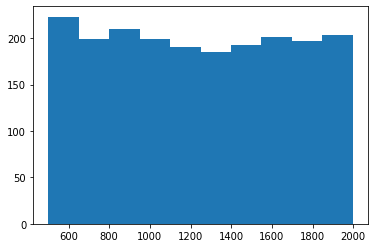

In [ ]:
plt.hist(train["battery_power"])

In [ ]:
conditions=[(train["battery_power"]<=852), (train["battery_power"]>852) & (train["battery_power"]<=1615), (train["battery_power"]>1615)]
values=[0, 1, 2]
train["bat_pow_bined"]=np.select(conditions, values)


## Task 6

In [ ]:
X=train.drop(["battery_power", "price_class"], axis=1)
y=train["price_class"]
print(log_reg(X,y))

0.904


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Task 5-b

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
categorical_features = ["bat_pow_bined"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features),
    ]
)

## Task 6

In [ ]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(random_state=0, max_iter=400))]
)
clf.fit(X, y)
y_preds=clf.predict(X)
roc_auc_score(y, y_preds)

0.5529999999999999

## Task 6

In [ ]:
train["area"]=train["px_width"]*train["px_height"]
X=train.drop(["price_class", "bat_pow_bined"], axis=1)
print(log_reg(X, y))

0.8955


## Task 10

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [47]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(random_state=0)

## Task 11

In [48]:
tree.export_text(clf)

'|--- feature_13 <= 2235.50\n|   |--- feature_13 <= 1569.50\n|   |   |--- feature_20 <= 2369522.00\n|   |   |   |--- feature_13 <= 1481.00\n|   |   |   |   |--- class: 0\n|   |   |   |--- feature_13 >  1481.00\n|   |   |   |   |--- feature_20 <= 1711768.00\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_20 >  1711768.00\n|   |   |   |   |   |--- class: 1\n|   |   |--- feature_20 >  2369522.00\n|   |   |   |--- feature_13 <= 1180.00\n|   |   |   |   |--- class: 0\n|   |   |   |--- feature_13 >  1180.00\n|   |   |   |   |--- feature_0 <= 1434.00\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_0 >  1434.00\n|   |   |   |   |   |--- feature_2 <= 2.25\n|   |   |   |   |   |   |--- feature_2 <= 0.60\n|   |   |   |   |   |   |   |--- feature_7 <= 0.30\n|   |   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |   |--- feature_7 >  0.30\n|   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |--- feature_2 >  0.60\n|   |   |   |   

In [49]:
clf.get_depth()

9

In [50]:
clf.get_n_leaves()

59

In [51]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

## Task 12

In [44]:
clf = DecisionTreeClassifier(random_state=0, max_depth=5)
clf.fit(X, y)
clf.score(X, y)

0.9745